### Performance Evaluation
---

In [1]:
import sys, os
sys.path.insert(1, '..')

import pandas as pd
import numpy as np
from IPython.display import display

%load_ext autoreload
%autoreload 2

import rdsutils.performance_eval as p_eval

In [2]:
modeling_df = pd.read_parquet('artifact/modeling_df_w_baseline_preds.parquet')
modeling_df.shape

(112599, 207)

In [3]:
df = modeling_df[~modeling_df.fico_score.isna()]

boruta_pred_1005 AUC: 0.93063  KS: 72.4
deposit_v1_pred AUC: 0.8563  KS: 57.9  #score missing: 0
fico_score AUC: 0.67792  KS: 44.1  #score2 missing: 0

Gains Table--Model:
  pct_cum_acct  #accts     min     max  target_num pct_cum_target  \
0        10.0%  9949.0  0.5357  1.0000      2893.0          79.8%   
1        20.0%  9949.0  0.2642  0.5357       293.0          87.9%   
2        30.0%  9949.0  0.1632  0.2642       140.0          91.8%   
3        40.0%  9949.0  0.1128  0.1632        89.0          94.2%   
4        50.0%  9949.0  0.0821  0.1128        55.0          95.8%   
5        60.0%  9949.0  0.0607  0.0821        43.0          96.9%   
6        70.0%  9949.0  0.0442  0.0607        41.0          98.1%   
7        80.0%  9949.0  0.0296  0.0442        23.0          98.7%   
8        90.0%  9949.0  0.0149  0.0296        29.0          99.5%   
9       100.0%  9949.0  0.0002  0.0149        18.0         100.0%   

  pct_cum_nontarget actual_rate    KS  
0              7.4%       29

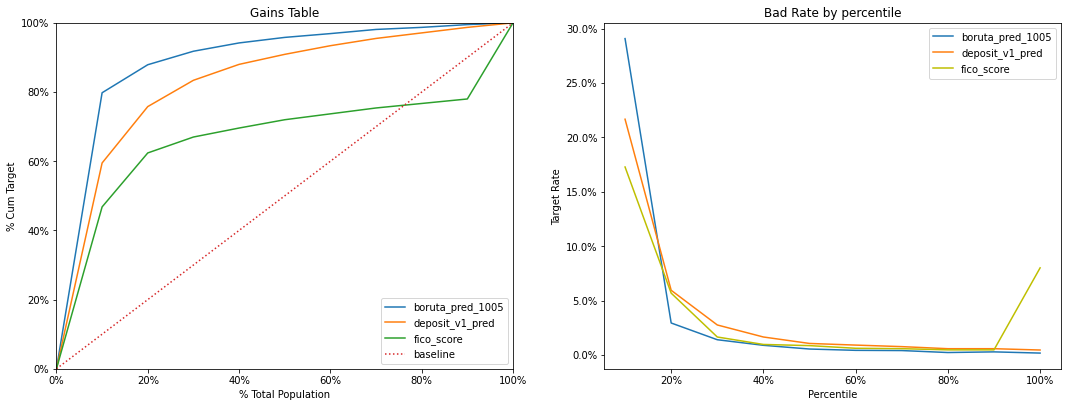

In [4]:
p_eval.model_score_eval(df['ach_target'],
                        df['boruta_pred_1005'],
                        df['deposit_v1_pred'],
                        -df['fico_score'],
                        display=1,
                        out='artifact/gains_table_example.csv')